# Paths in AC/DC Subcircuits from Verd 2019

From the actual collected data, I took all the crossings of gene expression levels (where one epression level drops below another) for data from T8. Below is a table describing what is observed in the node sensitivity analysis in Figure 2.

#### AC/DC1:

| A-P | Hb | Gt | Kr | Kni |
| ---- | --- | --- | --- | --- |
| 35 - 39 | * | H | L | 0 |
| 39 - 43 | H | * | L | 0 |
| 43 - 45 | H | L | * | 0 |
| 44 - 48 | * | L | H | 0 |

#### AC/DC2:

| A-P | Hb | Gt | Kr | Kni |
| ---- | --- | --- | --- | --- |
| 48 - 57 | * | 0 | H | L |
| 57 - 61 | L | 0 |H | * |

#### AC/DC3:

| A-P | Hb | Gt | Kr | Kni |
| ---- | --- | --- | --- | --- |
| 61 - 63 | 0 | L | H | * |
| 63 - 67 | 0 | L | * | H |
| 67 - 69 | 0 | * | L | H |
| 69 - 75 | 0 | H | L | * |

*: Gene must be 'on', but it is unknown how many thresholds the gene expression is above (if any),

H: Gene is above all of its thresholds

L: Gene is above one threshold but not above all,

0: Gene expression is off. 

In [1]:
import DSGRN
from DSGRN import *

import sys
sys.setrecursionlimit(10**8)
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/dsgrn_acdc/src')

from PGDraw import *
from MGsearchthroughPG import *
from NsearchgoeQuery import *

# AC/DC 1

In [2]:
database = Database("/home/elizabeth/Desktop/ACDC/ACDC_1.db") 
network = Network("/home/elizabeth/Desktop/ACDC/ACDC_1")
parameter_graph = ParameterGraph(network)
print(parameter_graph.size())

216


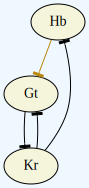

In [3]:
DrawGraph(network)

We need to decide what high, low and transitioning are for our fixed points. Starting out, I would like to have them described in the following way.

High for Hunchback (Hb) is 1, low is 0 and transitioning is [0,1].

High for Giant (Gt) is 1, low is 0 and transitioning is [0,1].

High for Kruppel (Kr) is 2, low is 0 and transitioning is [1,2].


| A-P | Hb | Gt | Kr |
| ---- | --- | --- | --- |
| 35 - 39 | [0,1] | 1 | 0 |
| 39 - 43 | 1 | [0,1] | 0 |
| 43 - 45 | 1 | 0 | [0,2] |
| 44 - 48 | [0,1] | 0 | 2 |

In [4]:
AP35 = {"Hb":[0,1], "Gt":1, "Kr":0}
AP39 = {"Hb":1, "Gt":[0,1], "Kr":0}
AP43 = {"Hb":1, "Gt":0, "Kr":[1,2]}
AP44 = {"Hb":[0,1], "Gt":0, "Kr":2}

In [5]:
D = [[AP35], [AP39], [AP43], [AP44]]
M = MGsearchthroughPG(database,'=', '=', D).allpaths()

2020-08-11 13:09:26.557123:
MatchQuery({'Hb': [0, 1], 'Gt': 1, 'Kr': 0}, Matches0)
2020-08-11 13:09:26.557576:
MatchQuery :: built expressions ["Label like 'FP { 0, _, _%' or Label like 'FP { 1, _, _%'", "Label like 'FP { _, 1, _%'", "Label like 'FP { _, _, 0%'"]
2020-08-11 13:09:26.557993:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _, _%' or Label like 'FP { 1, _, _%';
2020-08-11 13:09:26.558406:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 1, _%';
2020-08-11 13:09:26.558756:
MatchQuery :: create temp table Matches0 as select * from tmpMatches2 where Label like 'FP { _, _, 0%';
2020-08-11 13:09:26.559100:
MatchQuery :: constructed
2020-08-11 13:09:26.559903:
MatchQuery({'Hb': 1, 'Gt': [0, 1], 'Kr': 0}, Matches0)
2020-08-11 13:09:26.560124:
MatchQuery :: built expressions ["Label like 'FP { 1, _, _%'", "Label like 'FP { _, 0, _%' or Label like 'FP { _, 1, _%'", "Label

2020-08-11 13:09:26.618522:
MatchQuery :: constructed
2020-08-11 13:09:26.619219:
MatchQuery({'Hb': 1, 'Gt': 0, 'Kr': [1, 2]}, Matches0)
2020-08-11 13:09:26.619437:
MatchQuery :: built expressions ["Label like 'FP { 1, _, _%'", "Label like 'FP { _, 0, _%'", "Label like 'FP { _, _, 1%' or Label like 'FP { _, _, 2%'"]
2020-08-11 13:09:26.619641:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 1, _, _%';
2020-08-11 13:09:26.620098:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _%';
2020-08-11 13:09:26.620469:
MatchQuery :: create temp table Matches0 as select * from tmpMatches2 where Label like 'FP { _, _, 1%' or Label like 'FP { _, _, 2%';
2020-08-11 13:09:26.620791:
MatchQuery :: constructed


In [6]:
M

[[31, 32, 26, 62],
 [35, 32, 26, 62],
 [29, 32, 26, 62],
 [14, 32, 26, 62],
 [14, 8, 26, 62],
 [122, 116, 134, 170],
 [28, 29, 23, 59],
 [11, 29, 23, 59],
 [32, 29, 23, 59],
 [11, 5, 23, 59],
 [119, 113, 131, 167],
 [118, 112, 130, 166],
 [111, 112, 130, 166]]

In [7]:
n = 5
c = database.conn.cursor()
PGlist = M[n]
string = 'create temp table C as select * from Signatures where ParameterIndex in ({seq})'.format(
seq=','.join(['?']*len(PGlist)))
c.execute(string, PGlist)
MGindex = [ (row[0], row[1]) for row in c.execute('select * from C')]
c.execute('drop table C')
print('Path:',M[n])
print('Associated MGI:', MGindex) #doesn't come back in order

Path: [122, 116, 134, 170]
Associated MGI: [(116, 1), (122, 3), (134, 5), (170, 10)]


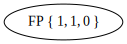

In [8]:
database.DrawMorseGraph(3) 

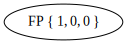

In [9]:
database.DrawMorseGraph(1)

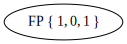

In [10]:
database.DrawMorseGraph(5)

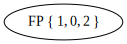

In [11]:
database.DrawMorseGraph(10)

# AC/DC 2

In [28]:
database = Database("/home/elizabeth/Desktop/ACDC/ACDC_2.db") 
network = Network("/home/elizabeth/Desktop/ACDC/ACDC_2")
parameter_graph = ParameterGraph(network)
print(parameter_graph.size())

216


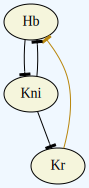

In [13]:
DrawGraph(network)

We need to decide what high, low and transitioning are for our fixed points. Starting out, I would like to have them described in the following way.

High for Hunchback (Hb) is 1, low is 0 and transitioning is [0,1].

High for Knirps (Kni) is 2, low is 0 and transitioning is [1,2].

High for Kruppel (Kr) is 1, low is 0 and transitioning is [0,1].


| A-P     | Hb  |  Kr  | Kni |
| ----    | --- |  --- | --- |
| 48 - 57 | [0,1]|  1   | 0   |
| 57 - 61 | 0   |  1    | [0,2]|

In [29]:
AP48 = {"Hb":[0,1], "Kr":1, "Kni":0}
AP57 = {"Hb":0, "Kr":1, "Kni":[1,2]}

In [30]:
D = [[AP48], [AP57]]
N = MGsearchthroughPG(database,'=', '=', D).allpaths()

2020-08-11 13:10:05.832275:
MatchQuery({'Hb': [0, 1], 'Kr': 1, 'Kni': 0}, Matches0)
2020-08-11 13:10:05.833102:
MatchQuery :: built expressions ["Label like 'FP { 0, _, _%' or Label like 'FP { 1, _, _%'", "Label like 'FP { _, 1, _%'", "Label like 'FP { _, _, 0%'"]
2020-08-11 13:10:05.833461:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _, _%' or Label like 'FP { 1, _, _%';
2020-08-11 13:10:05.834153:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 1, _%';
2020-08-11 13:10:05.834538:
MatchQuery :: create temp table Matches0 as select * from tmpMatches2 where Label like 'FP { _, _, 0%';
2020-08-11 13:10:05.834885:
MatchQuery :: constructed
2020-08-11 13:10:05.835656:
MatchQuery({'Hb': 0, 'Kr': 1, 'Kni': [1, 2]}, Matches0)
2020-08-11 13:10:05.835888:
MatchQuery :: built expressions ["Label like 'FP { 0, _, _%'", "Label like 'FP { _, 1, _%'", "Label like 'FP { _, _, 1%' or Lab

In [31]:
N

[[7, 25],
 [121, 139],
 [120, 138],
 [8, 26],
 [122, 140],
 [142, 140],
 [13, 31],
 [12, 30],
 [6, 24],
 [14, 32],
 [141, 139]]

In [32]:
n = 2
c = database.conn.cursor()
PGlist = N[n]
string = 'create temp table C as select * from Signatures where ParameterIndex in ({seq})'.format(
seq=','.join(['?']*len(PGlist)))
c.execute(string, PGlist)
MGindex = [ (row[0], row[1]) for row in c.execute('select * from C')]
c.execute('drop table C')
print('Path:',N[n])
print('Associated MGI:', MGindex) #doesn't come back in order

Path: [120, 138]
Associated MGI: [(120, 2), (138, 6)]


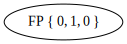

In [33]:
database.DrawMorseGraph(2)

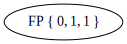

In [34]:
database.DrawMorseGraph(6)

# AC/DC 3

In [35]:
database = Database("/home/elizabeth/Desktop/ACDC/ACDC_3.db") 
network = Network("/home/elizabeth/Desktop/ACDC/ACDC_3")
parameter_graph = ParameterGraph(network)
print(parameter_graph.size())

216


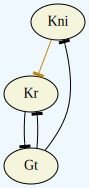

In [21]:
DrawGraph(network)

We need to decide what high, low and transitioning are for our fixed points. Starting out, I would like to have them described in the following way.

High for Giant (Hb) is 2, low is 0 and transitioning is [1,2].

High for Knirps (Kni) is 1, low is 0 and transitioning is [0,1].

High for Kruppel (Kr) is 1, low is 0 and transitioning is [0,1].

| A-P | Gt | Kr | Kni |
| ---- | --- | --- | --- |
| 61 - 63 | 0 | 1 | [0,1] |
| 63 - 67 | 0 | [0,1] | 1 |
| 67 - 69 | [0,2] | 0 | 1 |
| 69 - 75 | 2 | 0 | [0,1] |

In [22]:
AP61 = {"Kni":[0,1], "Gt":0, "Kr":1}
AP63 = {"Kni":1, "Gt":0, "Kr":[0,1]}
AP67 = {"Kni":1, "Gt":[1,2], "Kr":1}
AP69 = {"Kni":[0,1], "Gt":2, "Kr":[0,1]}

In [23]:
D = [[AP61], [AP63], [AP67], [AP69]]
O = MGsearchthroughPG(database,'=', '=', D).allpaths()

2020-08-11 13:09:26.873414:
MatchQuery({'Kni': [0, 1], 'Gt': 0, 'Kr': 1}, Matches0)
2020-08-11 13:09:26.873790:
MatchQuery :: built expressions ["Label like 'FP { 0, _, _%' or Label like 'FP { 1, _, _%'", "Label like 'FP { _, 1, _%'", "Label like 'FP { _, _, 0%'"]
2020-08-11 13:09:26.874056:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _, _%' or Label like 'FP { 1, _, _%';
2020-08-11 13:09:26.874618:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 1, _%';
2020-08-11 13:09:26.874947:
MatchQuery :: create temp table Matches0 as select * from tmpMatches2 where Label like 'FP { _, _, 0%';
2020-08-11 13:09:26.875289:
MatchQuery :: constructed
2020-08-11 13:09:26.876065:
MatchQuery({'Kni': 1, 'Gt': 0, 'Kr': [0, 1]}, Matches0)
2020-08-11 13:09:26.876301:
MatchQuery :: built expressions ["Label like 'FP { 1, _, _%'", "Label like 'FP { _, 0, _%' or Label like 'FP { _, 1, _%'", "Lab

2020-08-11 13:09:26.934551:
MatchQuery :: create temp table Matches0 as select * from tmpMatches2 where Label like 'FP { _, _, 1%' or Label like 'FP { _, _, 2%';
2020-08-11 13:09:26.935045:
MatchQuery :: constructed
2020-08-11 13:09:26.936079:
MatchQuery({'Kni': 1, 'Gt': [1, 2], 'Kr': 1}, Matches0)
2020-08-11 13:09:26.936410:
MatchQuery :: built expressions ["Label like 'FP { 1, _, _%'", "Label like 'FP { _, 1, _%'", "Label like 'FP { _, _, 1%' or Label like 'FP { _, _, 2%'"]
2020-08-11 13:09:26.936720:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 1, _, _%';
2020-08-11 13:09:26.937204:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 1, _%';
2020-08-11 13:09:26.937646:
MatchQuery :: create temp table Matches0 as select * from tmpMatches2 where Label like 'FP { _, _, 1%' or Label like 'FP { _, _, 2%';
2020-08-11 13:09:26.938047:
MatchQuery :: constructed


In [24]:
O

[[175, 178, 196, 214],
 [142, 178, 196, 214],
 [70, 178, 196, 214],
 [177, 178, 196, 214],
 [179, 178, 196, 214],
 [178, 179, 197, 194],
 [143, 179, 197, 194],
 [71, 179, 197, 194],
 [179, 71, 89, 107],
 [70, 71, 89, 107],
 [35, 71, 89, 107],
 [178, 179, 197, 215],
 [143, 179, 197, 215],
 [71, 179, 197, 215]]

In [38]:
n = 0
c = database.conn.cursor()
PGlist = O[n]
string = 'create temp table C as select * from Signatures where ParameterIndex in ({seq})'.format(
seq=','.join(['?']*len(PGlist)))
c.execute(string, PGlist)
MGindex = [ (row[0], row[1]) for row in c.execute('select * from C')]
c.execute('drop table C')
print('Path:',O[n])
print('Associated MGI:', MGindex) #doesn't come back in order

Path: [175, 178, 196, 214]
Associated MGI: [(175, 21), (178, 3), (196, 8), (214, 17)]


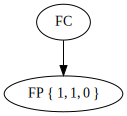

In [39]:
database.DrawMorseGraph(21)

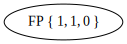

In [40]:
database.DrawMorseGraph(3)

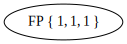

In [41]:
database.DrawMorseGraph(8)

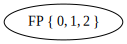

In [42]:
database.DrawMorseGraph(17)